# Lab 2 &ndash; Individual Analysis
## Part 1: Exploring the count distribution from the interval distribution

In [1]:
# Usual imports here, just execute to load into memory
import numpy as np  # import the numpy library functions.
import matplotlib.pyplot as plt # plotting functions

%matplotlib inline 

### Load the data file with the interval distribution

Use the `np.loadtxt()` function to load the collection of interval measurements, `Interval_data.csv`, into a numpy array.  Look up how this function is called with the **NumPy Reference** under the **Help** menu.  Store these values in an array called `intervals`.

In [2]:
# You write all here (only need one line)


Make sure it worked by printing some values, the array size and a couple of statistics like the mean and variance.  Use `help(intervals)` to see the list of methods.

In [3]:
# help(intervals)

In [3]:
# You write all here


[0.003574 0.00381  0.015907 ... 0.004671 0.000767 0.000117]
Interval array size =  15874
Mean of interval distribution = 0.00962
Variance of interval distribution = 0.0000933


### Make a histogram of the interval data

Make a histogram of the interval data with 50 bins.  Also look at it on a logarithmic axis.  What is the functional form that the distribution follows?  To set the axis scale to logarithmic, use, e.g., `plt.yscale('log')`.  Make sure to label your axes!

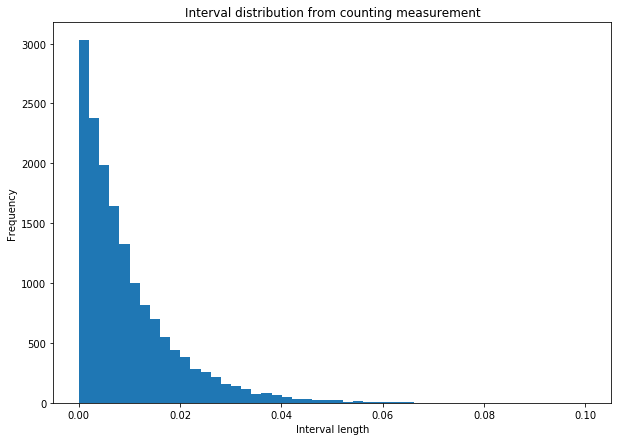

In [4]:
# First line makes the plot bigger 
plt.figure(figsize=(10,7))
# You fill in the rest

#plt.yscale('log')
#plt.yscale('linear')

### Make a function that uses the interval distribution to make a count distribution

This is a little tricky.  The **interval** distribution is a list of (real, positive) numbers, each one representing the **time between successive pulses**.  Your goal is to create a new array of (positive) **integers** where each number corresponds to the number of counts in a succession of fixed-length intervals.  This would be called a **count** distribution.  

To make this, you need an algorithm. Imagine laying the interval distribution out along a time line.  The `*` represent a pulse at a particular time.  The interval distribution comes from the time between each `*`.  Then match it to a succession of fixed-length intervals. The fixed-length intervals are represented by the bar lines `|`:

`|       3       |       2       |       4       |       0       |       2       |       2       |        . . .`
`|-*----*------*-|------*-*------|-*--**-------*-|---------------|--*-*----------|--*------*-----|--*-*-- . . .`

The number of `*`s between each pair of bars represents the counts in each fixed-length interval.  For example, above, we see 3 counts in fixed-interval 1, 2 in fixed-interval 2, 4 in 3, 0 in 4, 2 in 5, etc. This list of integers would be the count distribution for the particular fixed-interval length.  You can see that if the fixed intervals were of a different length, the count distribution would also be different.

#### The algorithm

The algorithm (i.e., the logical procedure) that creates the count distribution would look like this: 

1. Set up two "partial sums": one for the sum of the intervals in the interval distribution, and the other for the sum of successive fixed intervals.  Call the first sum *intervalDistributionSum* and the other *fixedIntervalSum*.  Set *intervalDistributionSum* = 0 and *fixedIntervalSum* = fixed-interval-length to start.
2. Set up an array to hold the count distribution.
3. Set up a variable to hold the number of counts in a given fixed interval, e.g., *this_intervals_counts*.
4. Enter a `for` loop to interate over the elements in the interval distribution:
   1. Add the first interval in the interval distribution to *intervalDistributionSum*. 
   2. Is *intervalDistributionSum* less than *fixedIntervalSum*?  
      1. If so: Add 1 count to *this_intervals_counts*.
      2. If not, the current fixed interval is done, so 
         * Add the number in *this_intervals_counts* to the count distribution array in by appending it as an array element. 
         * Then reset *this_intervals_counts* to 1, because it will go into the next (or higher) interval. 
         * Finally, add a fixed-interval-length to *fixedIntervalSum*.
   3. Enter a `while` loop to add empty intervals to the count distribution array until *fixedIntervalSum* is greated than *intervalDistributionSum*:
      1. Increment *fixedIntervalSum* by a fixed-interval-length.
      2. append a 0 to the count distribution array.
   4. Once *fixedIntervalSum* is greater than *intervalDistributionSum*, continue with the next interval in the `for` loop by adding it to *intervalDistributionSum*.
5. Once the `for` loop is complete, return the count distribution array.  Note: The last fixed interval may be incomplete.  It should not be added to teh array

In the code block below, the lines you need to write are indicated by `#### Write this line #####`. 

In [5]:
def make_count_dist(interval_dist,fixed_interval_length=1.0):
    # Set up count distribution array
    # Make it a zero-length array of "dtype=int"
    count_dist = np.zeros(0,dtype=int)
    
      # Initialize loop variables. You will need three:
      #     fixedIntervalSum : the partial sum of the fixed intervals up to a point
      #                        Initialize to the fixed_interval_length
    #### Write this line ##### 
      #     intervalDistributionSum : the partial sum of the intervals in the interval distribution up
      #                               to a point. Initialize to zero
    #### Write this line ##### 
      #     this_intervals_counts : The number of counts in the current fixed interval.
      #                             Initialize to zero
    #### Write this line ##### 

    # Loop with each element in the interval distribution
    for interval in interval_dist:
        #  For each interval in interval_dist, add it to the sum of the previous intervals
        #### Write this line ##### 
 
        if ( intervalDistributionSum <= fixedIntervalSum ):
            # If the sum lies within the current fixed interval, then increment the counts in this interval
            #### Write this line ##### 
        
        else: # Otherwise, the intervalDistributionSum is above the fixed interval sum, so 
              # add the current counts to the count distribution
            #### Write this line ##### 
              # Reset the interval counts to 1, since this count may go into the next interval
            #### Write this line ##### 
              # Add the next fixed interval to the fixedIntervalSum
            #### Write this line ##### 
              # However, it may still be too small, so increment
              # the fixedIntervalSum and number of zero-count elements in count_dist
              # until the intervalDistributionSum is larger than the fixedIntervalSum.
            while (intervalDistributionSum > fixedIntervalSum):
                  # increment the fixed interval sum
                #### Write this line #####
                  # Add an empty interval to the array
                #### Write this line #####     
        
        # Then go get the next interval from the interval_dist array
    # When all done, return the count distribution array
    return count_dist


### Test your function

Take a slice of, say, 100 values from the `intervals` array, and feed it to the function above.

Then calculate the length of the resulting count distribution, the sum of the number of counts in the distribution, and the mean and variance the distribution.  If your function works, the number of counts should be equal to the length of the slice, and the mean and variance should be about the same.  

Try your function with different fixed interval lengths, e.g., 0.02, 0.1, and 1 second.  What happens if the fixed interval length is greater than the sum of the intervals in the slice?

In [6]:
# Just execute this code block and consider the results

test_dist = intervals[0:100]
test_interval = .1 # seconds
counts_array = make_count_dist(test_dist,fixed_interval_length=test_interval)

# Looking at basic statistics.  For Poisson, mean should equal variance

print('Number of counts = {:d}'.format(counts_array.sum()))
print('Mean = {:.4f}'.format(counts_array.mean()))
print('Variance = {:.4f}'.format(counts_array.var()))


Number of counts = 98
Mean = 9.8000
Variance = 12.5600


### Plot a histogram of the count distribution

Plot what you just calculated.  If it works, try your function on the whole data set.  Again, make sure to label your axes.

Recommended: make variable called `mybins` and set it to, say, 50.  Then pass the following arguments to the `plt.hist()` function: `bins=mybins, range=(0,mybins)`  This will make the x-axis behave in a sensible way.

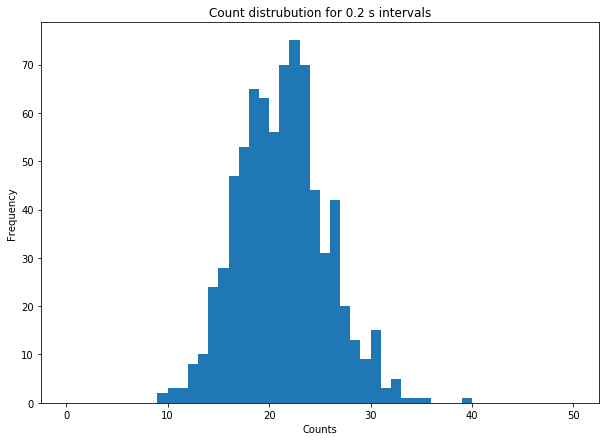

In [8]:
# Run the function on the whole data set and plot a histogram

# You write all here


### OPTIONAL: Compare the plot to a Poisson distribution

From `scipy.stats` import the `poisson()` function.  This is a function that will create a discrete Poisson distribution.  Look up the information under Help under **SciPy Reference**.  In particular, you will need to use the `poisson.pmf()` method to obtain a theoretical "curve". 

You will need to normalize the theoretical distribution to the size of the count distribution array.  Think about why this is true.

In [48]:
from scipy.stats import poisson

# make a function to return a theoretical distribution from the mean and size of the count distribution.
def poisson_theory(count_dist,bins):
# Complete the rest of this function



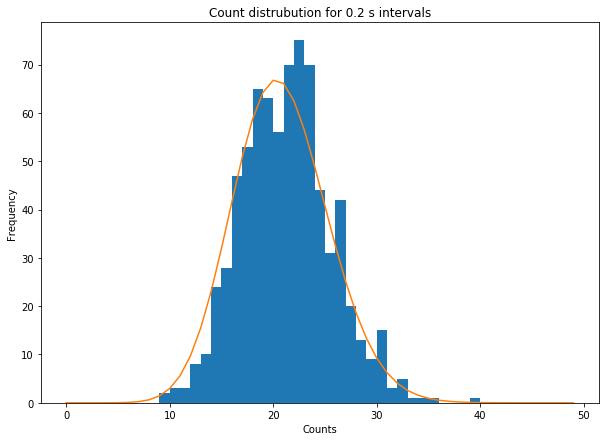

In [49]:
# Just copy what you used to make the the histogram above and add the line
# plt.plot(poisson_theory,'-') to overlay the theory, for example
# mybins = 50
# plt.plot(poisson_theory(counts_array, mybins),'-')

# You write rest



### Plot histograms of three different count distributions on the same graph

Rerun the `make_count_dist()` function using three different fixed interval lengths and plot the results on the same graph in order to see how they evolve as the fixed interval changes.  (Add the theoretical distributions if you like.)


Keep the same number of bins and range for all, e.g., `mybins=60`.  Use the "kwargs" code from the previous analysis assignment to allow plost to overlap and still be visible.

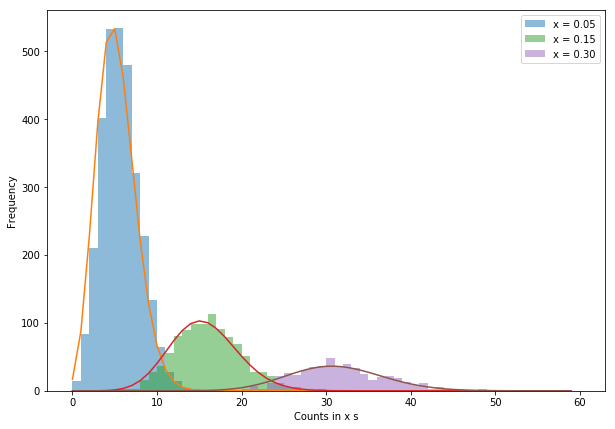

In [12]:
#plot histograms with different intervals

mybins = 60
kwargs = dict(bins=mybins, range=(0,mybins), alpha=0.5)
plt.figure(figsize=(10,7))
plt.xlabel('Counts in x s')
plt.ylabel('Frequency')
#
# Complete the rest of this block.  fixed interval lengths of .05, .15 and .30 s work well.



## Part 2: Plot the delay-curve data and estimate the optimal detector delay

This is easier than part 1.  You just need to plot the data in a sensible way.  Optionally, you can use the computer to calculate a centroid.

Start by copying the delay curve data into the two numpy arrays.  **Note:** You need to set one of the delay time sets of data to a negative value, so that the delay of one counter to the other is a continuously-changing value.  In other words, if you delay detector 1 by 8ns relative to detector 2, then detector 2 is delayed by &ndash;8ns relative to detector 1.

In [13]:
# Fill in the arrays below.  delay_times will be the x-axis of the plot, delay_counts the y axis.

delay_times = np.array([], dtype=float)
delay_counts = np.array([], dtype=int)


21 21


Then make a plot of the data.  Label the axes and title the graph.

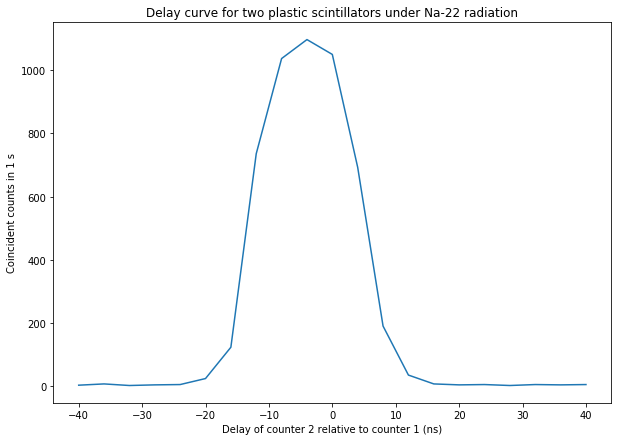

In [34]:
# You write all here

An easy centroid to calculate is a weighted average of the time data. With time in $x$ and counts in $y$ a formula for the centroid would be:

$$ x_\text{cent} = \frac{\sum x_iy_i}{\sum y_i}$$

If you know how numpy arrays handle element by element operations, you can write a function for the above in one line of code.

In [35]:
# Write a function to calculate a centroid
# This assumes numpy arrays are used
def get_centroid(xdata,ydata):
    return #### You complete this line ####

# Apply it to obtain the center

best_delay = get_centroid(delay_times,delay_counts)
print('Optimal delay = {:.2f} ns'.format(best_delay))

Optimal delay = -3.76 ns


### Plot the location of the centroid and estimate the width of the delay curve

Plot the position of the optimal delay time using the `plt.axvline(x)` function, where `x` is the position of a vertical line on the horizontal axis.  

Also turn on the plotting grid with `plt.grid()` to help estimate the width of the delay curve at half maximum.  How does this width compare to the widths of the discriminator outputs, which are about 10 ns each?

#### Record your estimate in this Markdown cell here:

My estimate is from -13 to +5 ns, or a width of 18 ns.  This is almost double the width of the 10ns pulses, as one would expect: coincidence would be recorded if the two pulses overlap to nearly any extent, which hould be about equal to the sum of the two pulse widths. 

Estimated width = 18 ns

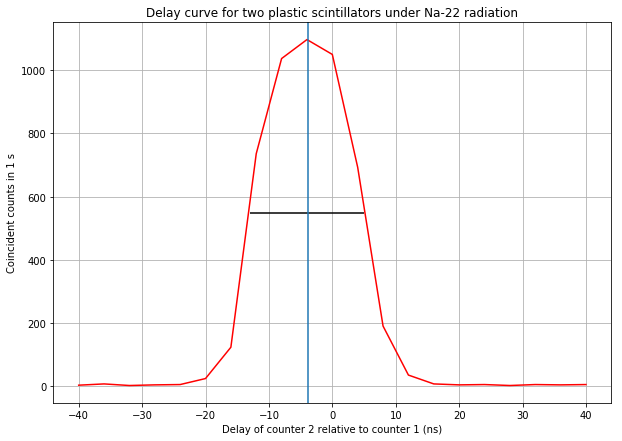

In [38]:
# You write all here